<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#LLCDS" data-toc-modified-id="LLCDS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLCDS</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Activity/Binding" data-toc-modified-id="Activity/Binding-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Activity/Binding</a></span></li><li><span><a href="#Silent" data-toc-modified-id="Silent-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Silent</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* GTDB-r202 taxonomy for target flagellins

# Var

In [168]:
work_dir = '/ebio/abt3_projects/small_projects/nyoungblut/flagellin_curMG/flg_tax/'

ba_file = file.path(dirname(work_dir), 'flagellin_bind-activ.tsv')

db_dir = '/ebio/abt3_projects/databases_no-backup/GTDB/release202/diamond_db/GTDB202.dmnd'

# Init

In [169]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)
Init()

# Load

In [200]:
# flagellin binding/activity
ba = Fread(ba_file) %>%
    mutate.(flg_status = case_when.(avg.activity > -2.066 ~ 'Active',
                                    avg.activity <= -2.066 & avg.binding < 0.33 ~ 'Evader',
                                    avg.activity <= -2.066 & avg.binding >= 0.33 ~ 'Silent'))
ba

number,ID,avg.activity,avg.binding,flg_status
<chr>,<chr>,<dbl>,<dbl>,<chr>
1,rf_1_ABWN01000042.1:c42751-41393,-6.000000,1.0216983,Silent
2,rf_1_ACFY01000033.1:10898-12379,-2.726659,0.2762158,Evader
⋮,⋮,⋮,⋮,⋮
C4ZDK3**,C4ZDK3,-3.917991,NA,NA
R7CCG6**,R7CCG6,-3.183865,NA,NA


# LLCDS

### Config

In [4]:
F = file.path(work_dir, 'config.yaml')
cat_file(F)

#-- I/O --#
sample_file: /ebio/abt3_projects/small_projects/nyoungblut/flagellin_curMG/llcds_1mil/samples.tsv

# output location
output_dir: /ebio/abt3_projects/small_projects/nyoungblut/flagellin_curMG/flg_tax/

# samples file (if running "map" part of the pipeline
map_file: tests/samples/samples_amy_n6.txt

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- subsample --#
# subsampling input reads (if samples_file not skipped)
## Use "Skip" to skips subsampling; otherwise set the number of reads to subsample
subsample_depth: Skip       # reads will be subsampled to this depth (eg., 1000000)
subsample_seed: 21068

#-- main control --#
# Which major steps of the pipeline to run?
run_pipeline_steps:
  annotation: False
  taxonomy: True
  mapping: False
  pathways: False

#-- software parameters --#
# Notes:
## Use "Skip" to skip any step. If no params, just use ""
params:
  ionice: -c 3
  seqkit: -v --min-len 30
  just_read1: False
  

### Run

```
(snakemake) @ rick:/tmp/global2/nyoungblut/code/dev/ll_pipelines/llcds/tmp/llcds
$ screen -L -S llcds-flg-tax ./snakemake_sge.sh /ebio/abt3_projects/small_projects/nyoungblut/flagellin_curMG/flg_tax/config.yaml 30 -F
```

## Summary

In [201]:
F = file.path(work_dir, 'taxonomy', 'diamond', 'flagellins', 'taxonomy.tsv.gz')
tax = Fread(F) %>%
    select.(-V2, -V5) %>%
    rename.('query' = V1,
            'e_value' = V3,
            'lineage' = V4) %>%
    separate.(lineage, taxonomy_levels(), sep=';') %>%
    mutate.(Phylum = ifelse(Phylum == '', 'Unclassified_bacteria', Phylum)) %>% 
    mutate.(across.(.cols = c(Phylum, Class, Order, Family, Genus, Species), 
                    ~ ifelse(.x == '' | is.na(.x), 'Unclassified', .x))) 
tax

query,e_value,Domain,Phylum,Class,Order,Family,Genus,Species
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
FliC,0.00e+00,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Salmonella,Salmonella enterica
CBir1,1.28e-247,Bacteria,FirmicutesA,Clostridia,Lachnospirales,Lachnospiraceae,COE1,COE1 sp002492295
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
rf_1_CBFF010000015.1:c3569-2202,9.35e-312,Bacteria,FirmicutesA,Clostridia,Lachnospirales,Lachnospiraceae,ButyrivibrioA,ButyrivibrioA sp000431815
rf_1_NZ_JAHA01000010.1:c126965-126138,3.39e-173,Bacteria,FirmicutesA,Clostridia,Lachnospirales,Lachnospiraceae,Butyrivibrio,Butyrivibrio sp000526935


In [202]:
# adding activity/binding
overlap(tax$query, ba$ID)
tax = tax %>%
    inner_join.(ba, c('query'='ID'))
tax

intersect(x,y): 126 
setdiff(x,y): 0 
setdiff(y,x): 1 
union(x,y): 127 


query,e_value,Domain,Phylum,Class,Order,Family,Genus,Species,number,avg.activity,avg.binding,flg_status
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
rf_1_ABWN01000042.1:c42751-41393,1.46e-302,Bacteria,FirmicutesA,Clostridia,Lachnospirales,Lachnospiraceae,ButyrivibrioA,Unclassified,1,-6.000000,1.0216983,Silent
rf_1_ACFY01000033.1:10898-12379,0.00e+00,Bacteria,FirmicutesA,Clostridia,Lachnospirales,Lachnospiraceae,Roseburia,Unclassified,2,-2.726659,0.2762158,Evader
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
C4ZDK3,1.43e-169,Bacteria,FirmicutesA,Clostridia,Lachnospirales,Lachnospiraceae,Agathobacter,Agathobacter rectalis,C4ZDK3**,-3.917991,NA,NA
R7CCG6,7.34e-168,Bacteria,FirmicutesA,Clostridia,Lachnospirales,Lachnospiraceae,EubacteriumF,EubacteriumF sp000433735,R7CCG6**,-3.183865,NA,NA


In [203]:
tax$Domain %>% table
tax$Phylum %>% table

.
Bacteria 
     126 

.
     Campylobacterota         Cyanobacteria            Firmicutes 
                    1                     1                     1 
          FirmicutesA        Proteobacteria Unclassified_bacteria 
                  116                     5                     2 

### Activity/Binding

Warning message:
“Removed 2 rows containing missing values (position_stack).”
Warning message:
“Removed 47 rows containing missing values (geom_segment).”
Warning message:
“Removed 48 rows containing missing values (geom_segment).”


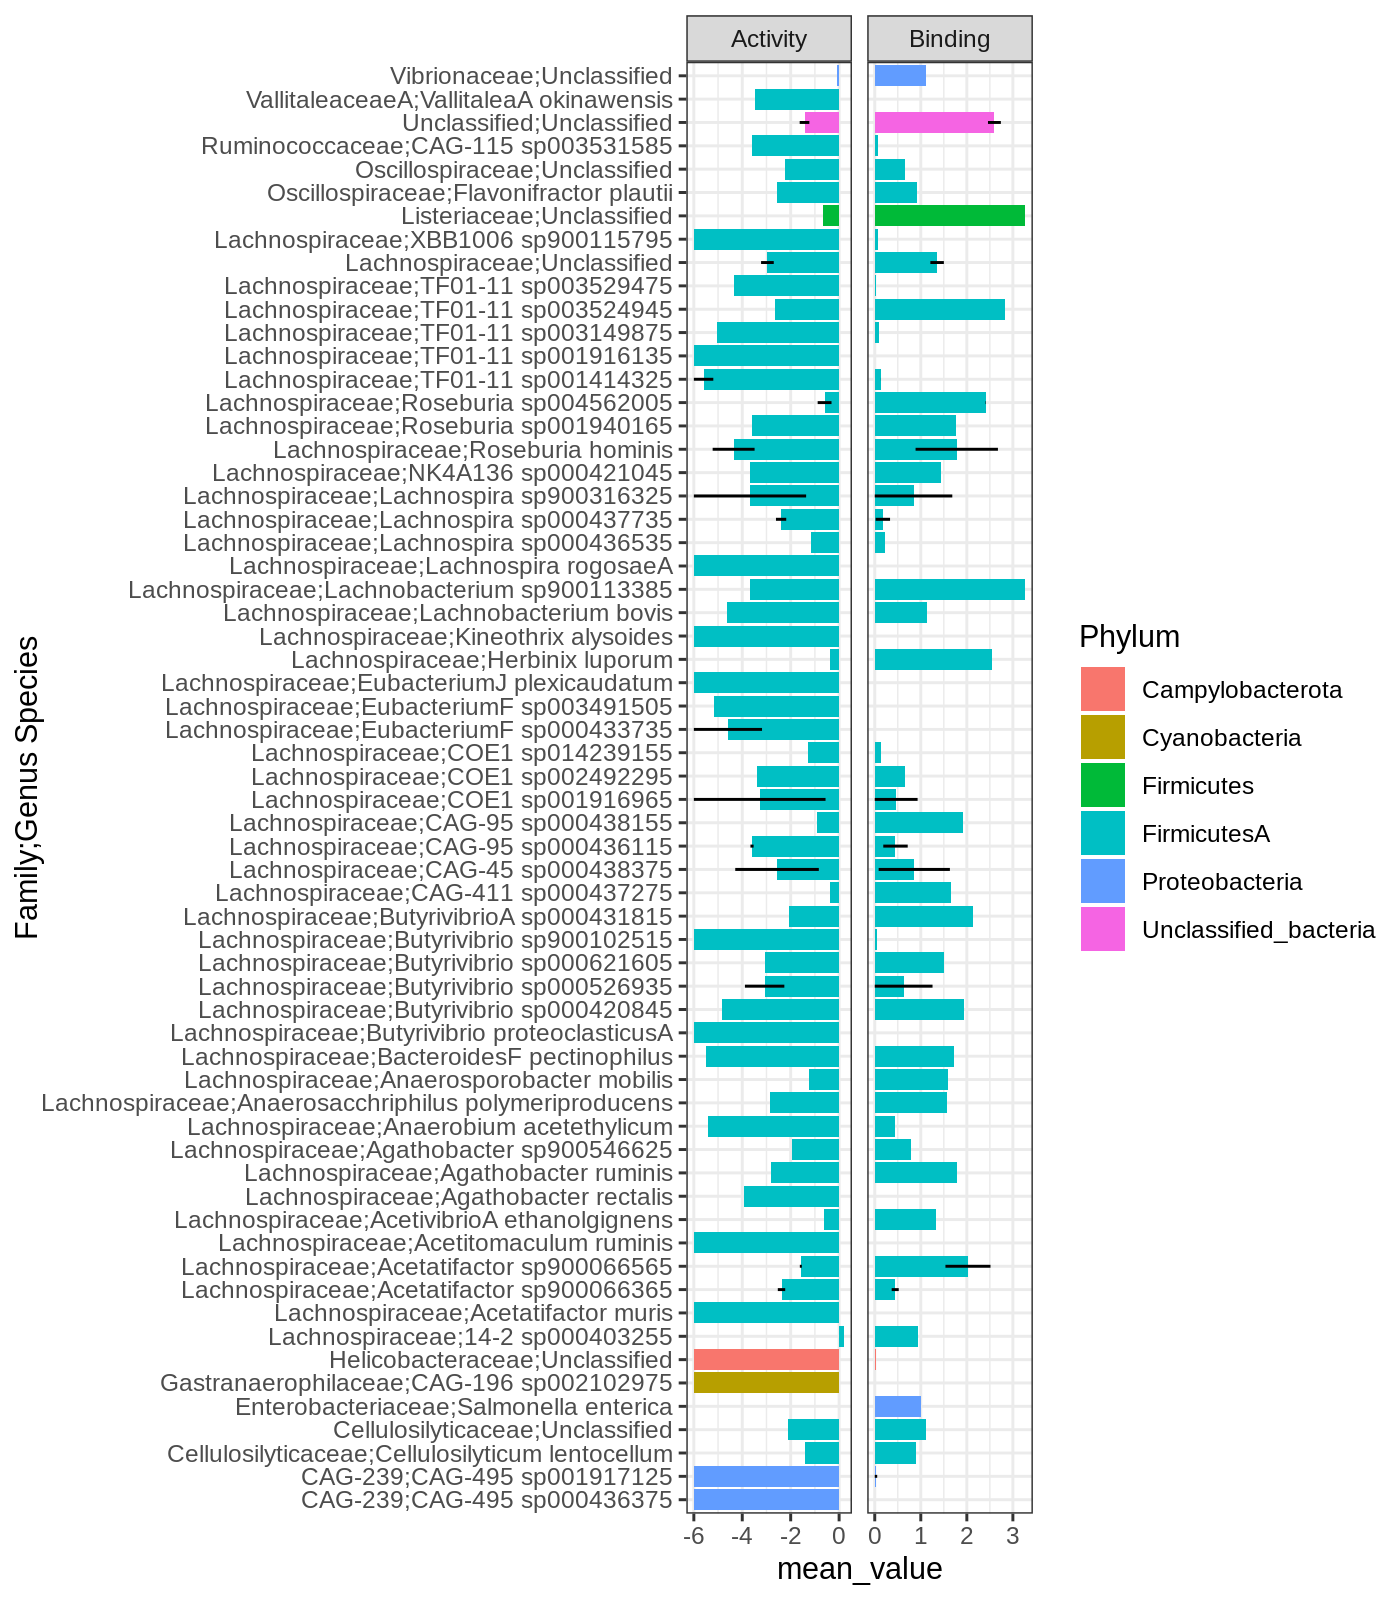

In [204]:
p = tax %>%
    mutate.(taxonomy = paste(Family, Species, sep=';')) %>%
    pivot_longer.(cols=c(avg.activity, avg.binding)) %>%
    summarize.(mean_value = mean(value),
               stderr_value = sd(value) / sqrt(length(value)),
               .by = c(taxonomy, Phylum, name)) %>%
    mutate.(name = ifelse(name == 'avg.activity', 'Activity', 'Binding')) %>%
    ggplot(aes(taxonomy, mean_value, fill=Phylum)) +
    geom_bar(stat='identity') +
    geom_linerange(aes(ymin = mean_value - stderr_value,
                       ymax = mean_value + stderr_value)) +
    labs(x='Family;Genus Species') +
    facet_grid(. ~ name, scales='free_x') +
    theme_bw() +
    coord_flip()
p.dims(7,8)
plot(p)

Warning message:
“Removed 2 rows containing missing values (position_stack).”
Warning message:
“Removed 47 rows containing missing values (geom_segment).”
Warning message:
“Removed 48 rows containing missing values (geom_segment).”


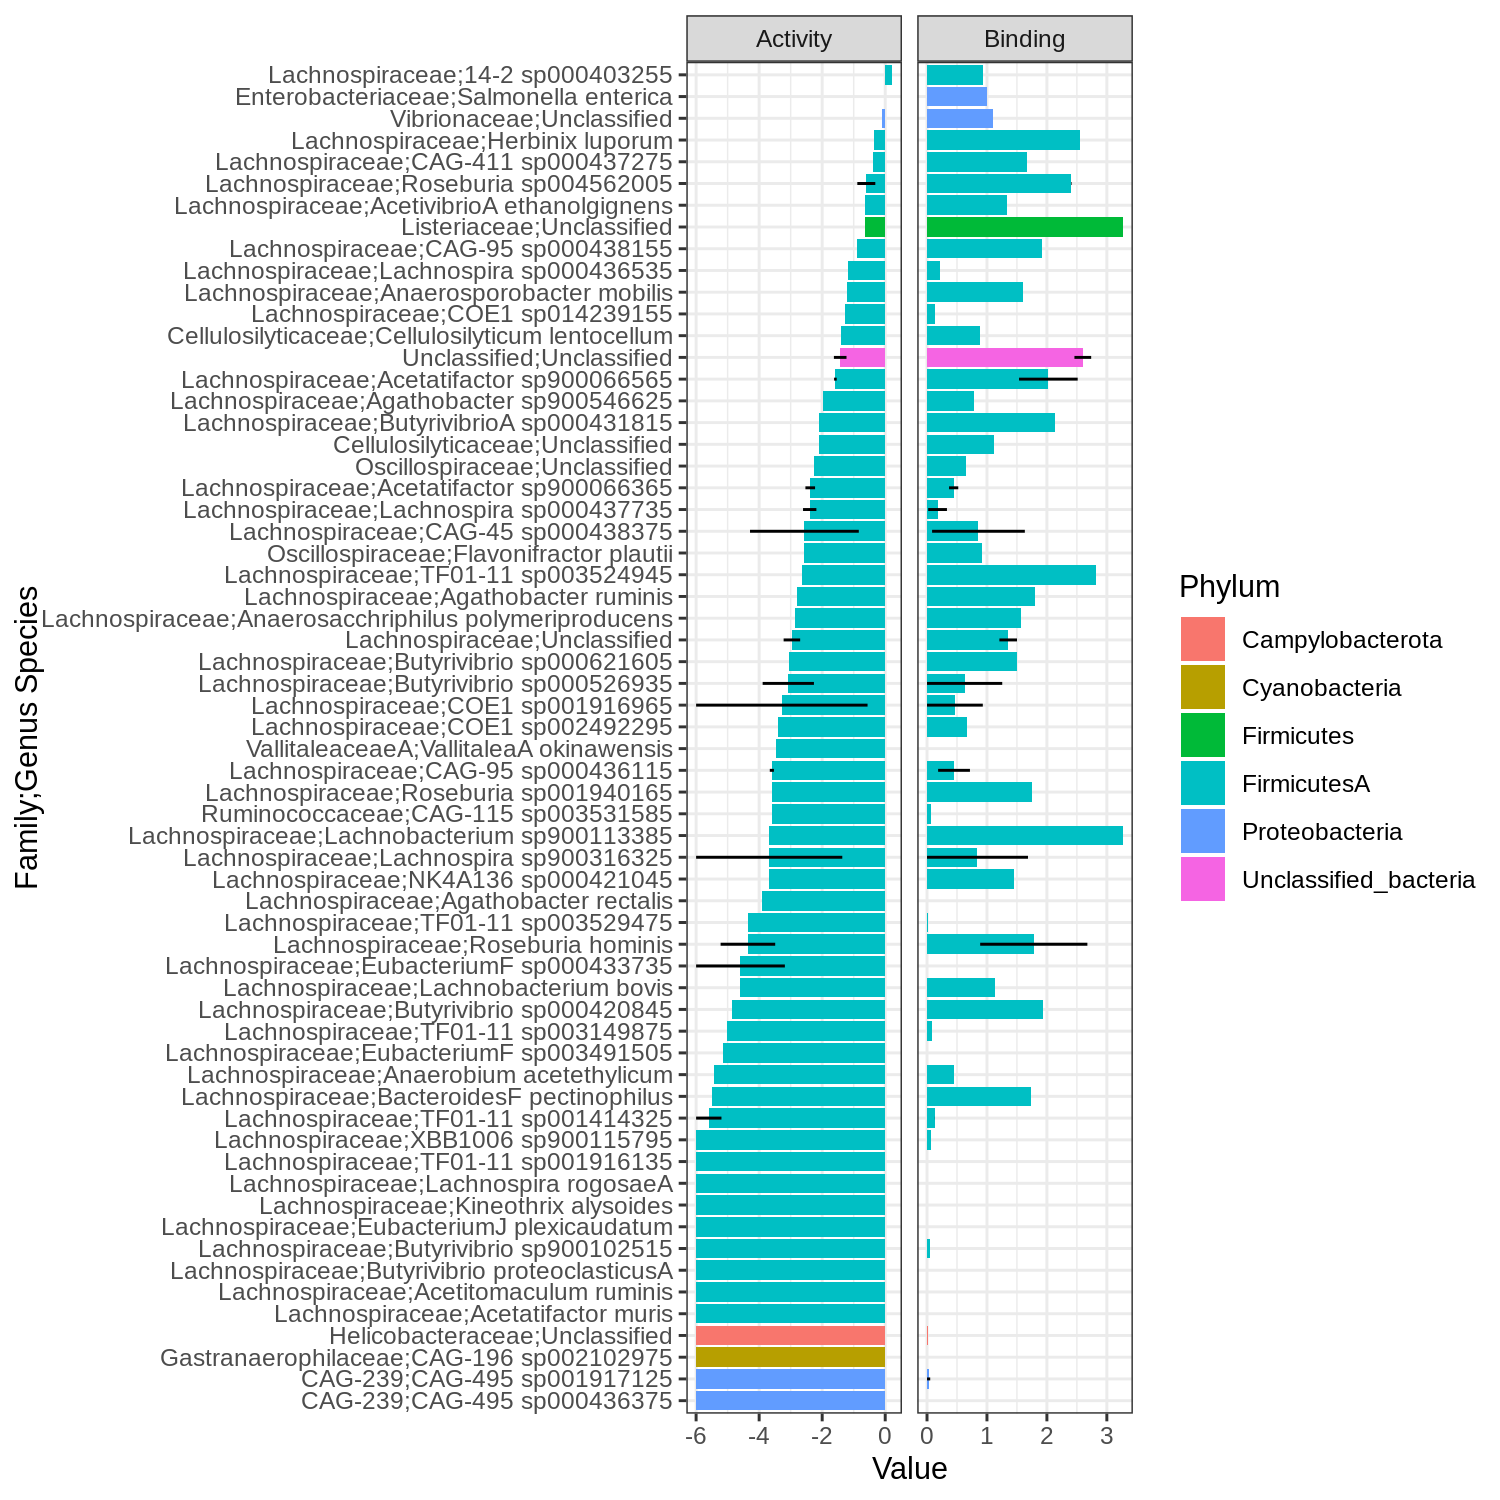

In [205]:
tmp = tax %>%
    mutate.(taxonomy = paste(Family, Species, sep=';')) %>%
    select.(taxonomy, avg.activity) %>%
    summarize.(mean_avg.activity = mean(avg.activity),
               .by = c(taxonomy))

p = tax %>%
    mutate.(taxonomy = paste(Family, Species, sep=';')) %>%
    pivot_longer.(cols=c(avg.activity, avg.binding)) %>%
    summarize.(mean_value = mean(value),
               stderr_value = sd(value) / sqrt(length(value)),
               .by = c(taxonomy, Phylum, name)) %>%
    inner_join.(tmp, c('taxonomy')) %>%
    mutate.(taxonomy = reorder(taxonomy, mean_avg.activity)) %>%
    mutate.(name = ifelse(name == 'avg.activity', 'Activity', 'Binding')) %>%
    ggplot(aes(taxonomy, mean_value, fill=Phylum)) +
    geom_bar(stat='identity') +
    geom_linerange(aes(ymin = mean_value - stderr_value,
                       ymax = mean_value + stderr_value)) +
    labs(x='Family;Genus Species', y='Value') + 
    facet_grid(. ~ name, scales='free_x') +
    theme_bw() +
    coord_flip()
p.dims(7.5,7.5)
plot(p)

Warning message:
“Removed 2 rows containing missing values (position_stack).”
Warning message:
“Removed 22 rows containing missing values (geom_segment).”
Warning message:
“Removed 24 rows containing missing values (geom_segment).”


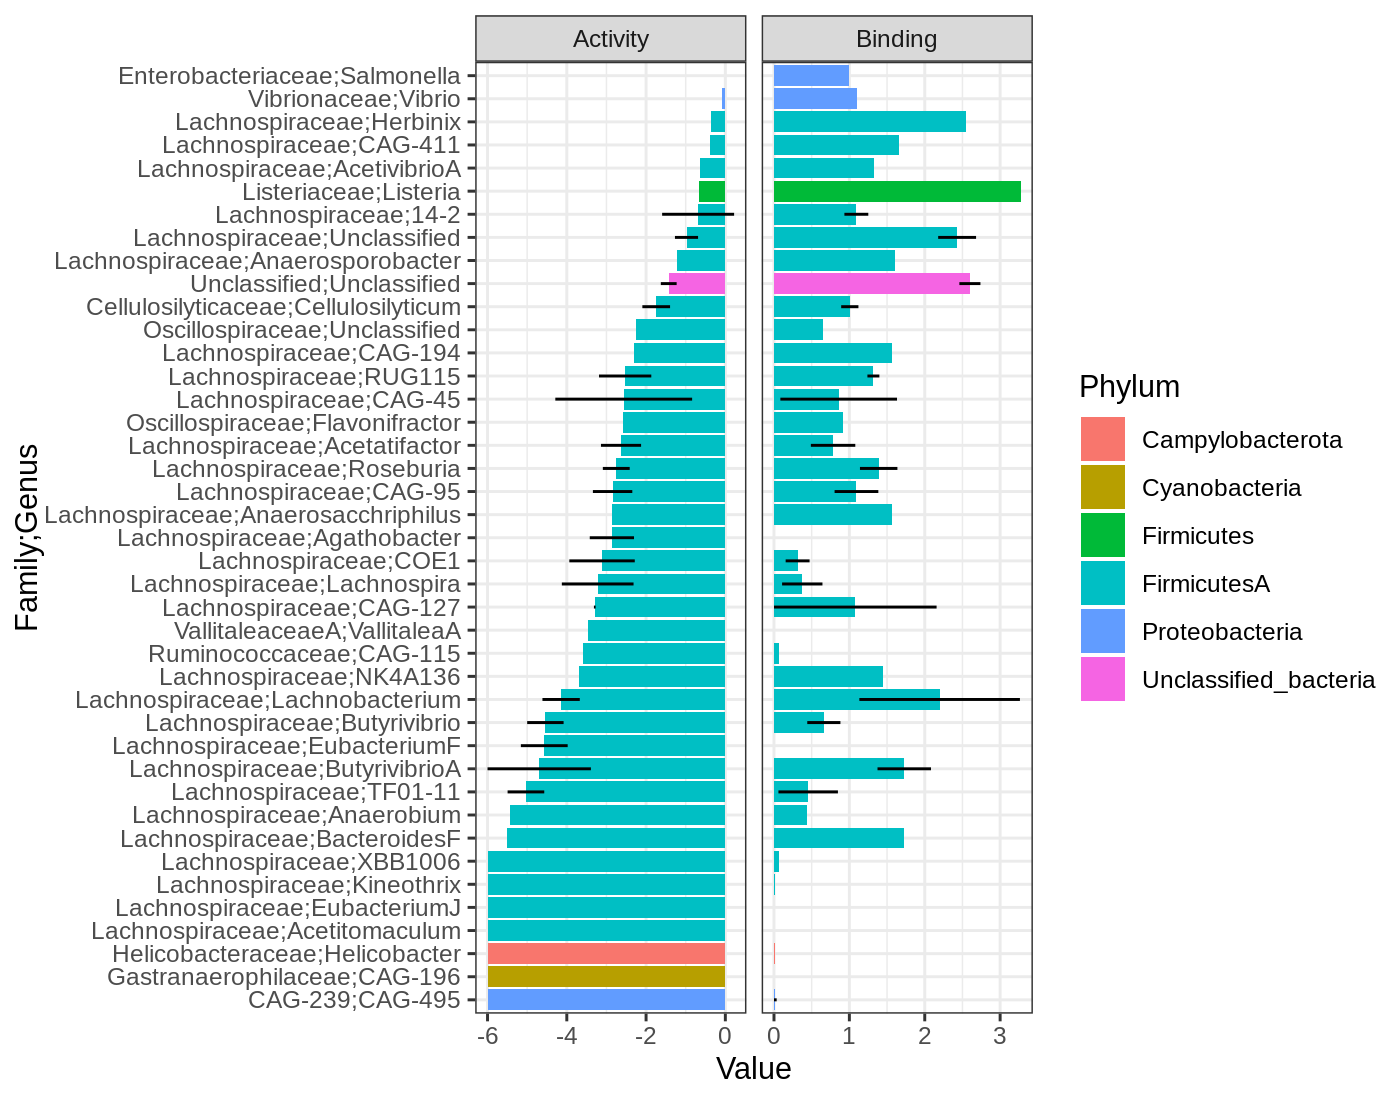

In [206]:
tmp = tax %>%
    mutate.(taxonomy = paste(Family, Genus, sep=';')) %>%
    select.(taxonomy, avg.activity) %>%
    summarize.(mean_avg.activity = mean(avg.activity),
               .by = c(taxonomy))

p = tax %>%
    mutate.(taxonomy = paste(Family, Genus, sep=';')) %>%
    pivot_longer.(cols=c(avg.activity, avg.binding)) %>%
    summarize.(mean_value = mean(value),
               stderr_value = sd(value) / sqrt(length(value)),
               .by = c(taxonomy, Phylum, name)) %>%
    inner_join.(tmp, c('taxonomy')) %>%
    mutate.(taxonomy = reorder(taxonomy, mean_avg.activity)) %>%
    mutate.(name = ifelse(name == 'avg.activity', 'Activity', 'Binding')) %>%
    ggplot(aes(taxonomy, mean_value, fill=Phylum)) +
    geom_bar(stat='identity') +
    geom_linerange(aes(ymin = mean_value - stderr_value,
                       ymax = mean_value + stderr_value)) +
    labs(x='Family;Genus', y='Value') + 
    facet_grid(. ~ name, scales='free_x') +
    theme_bw() +
    coord_flip()
p.dims(7,5.5)
plot(p)

Warning message:
“Removed 1 rows containing missing values (position_stack).”
Warning message:
“Removed 7 rows containing missing values (geom_segment).”
Warning message:
“Removed 8 rows containing missing values (geom_segment).”


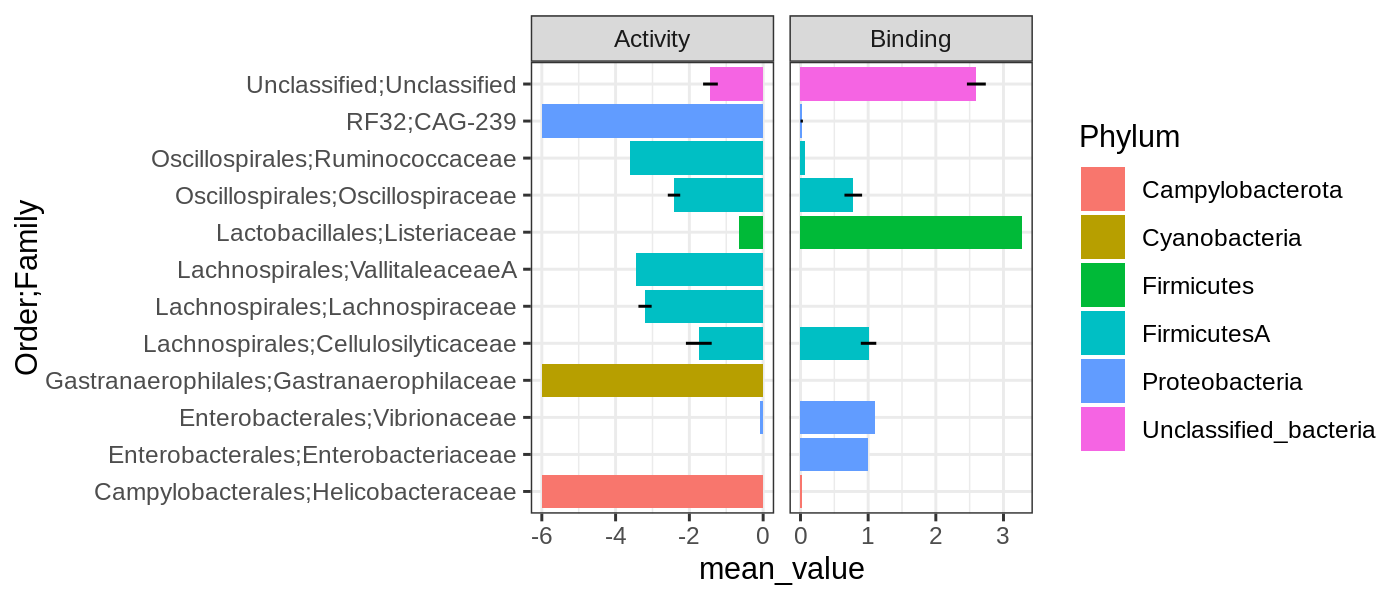

In [207]:
p = tax %>%
    mutate.(taxonomy = paste(Order, Family, sep=';')) %>%
    pivot_longer.(cols=c(avg.activity, avg.binding)) %>%
    summarize.(mean_value = mean(value),
               stderr_value = sd(value) / sqrt(length(value)),
               .by = c(taxonomy, Phylum, name)) %>%
    mutate.(name = ifelse(name == 'avg.activity', 'Activity', 'Binding')) %>%
    ggplot(aes(taxonomy, mean_value, fill=Phylum)) +
    geom_bar(stat='identity') +
    geom_linerange(aes(ymin = mean_value - stderr_value,
                       ymax = mean_value + stderr_value)) +
    labs(x='Order;Family') +
    facet_grid(. ~ name, scales='free_x') +
    theme_bw() +
    coord_flip()
p.dims(7,3)
plot(p)

### Silent

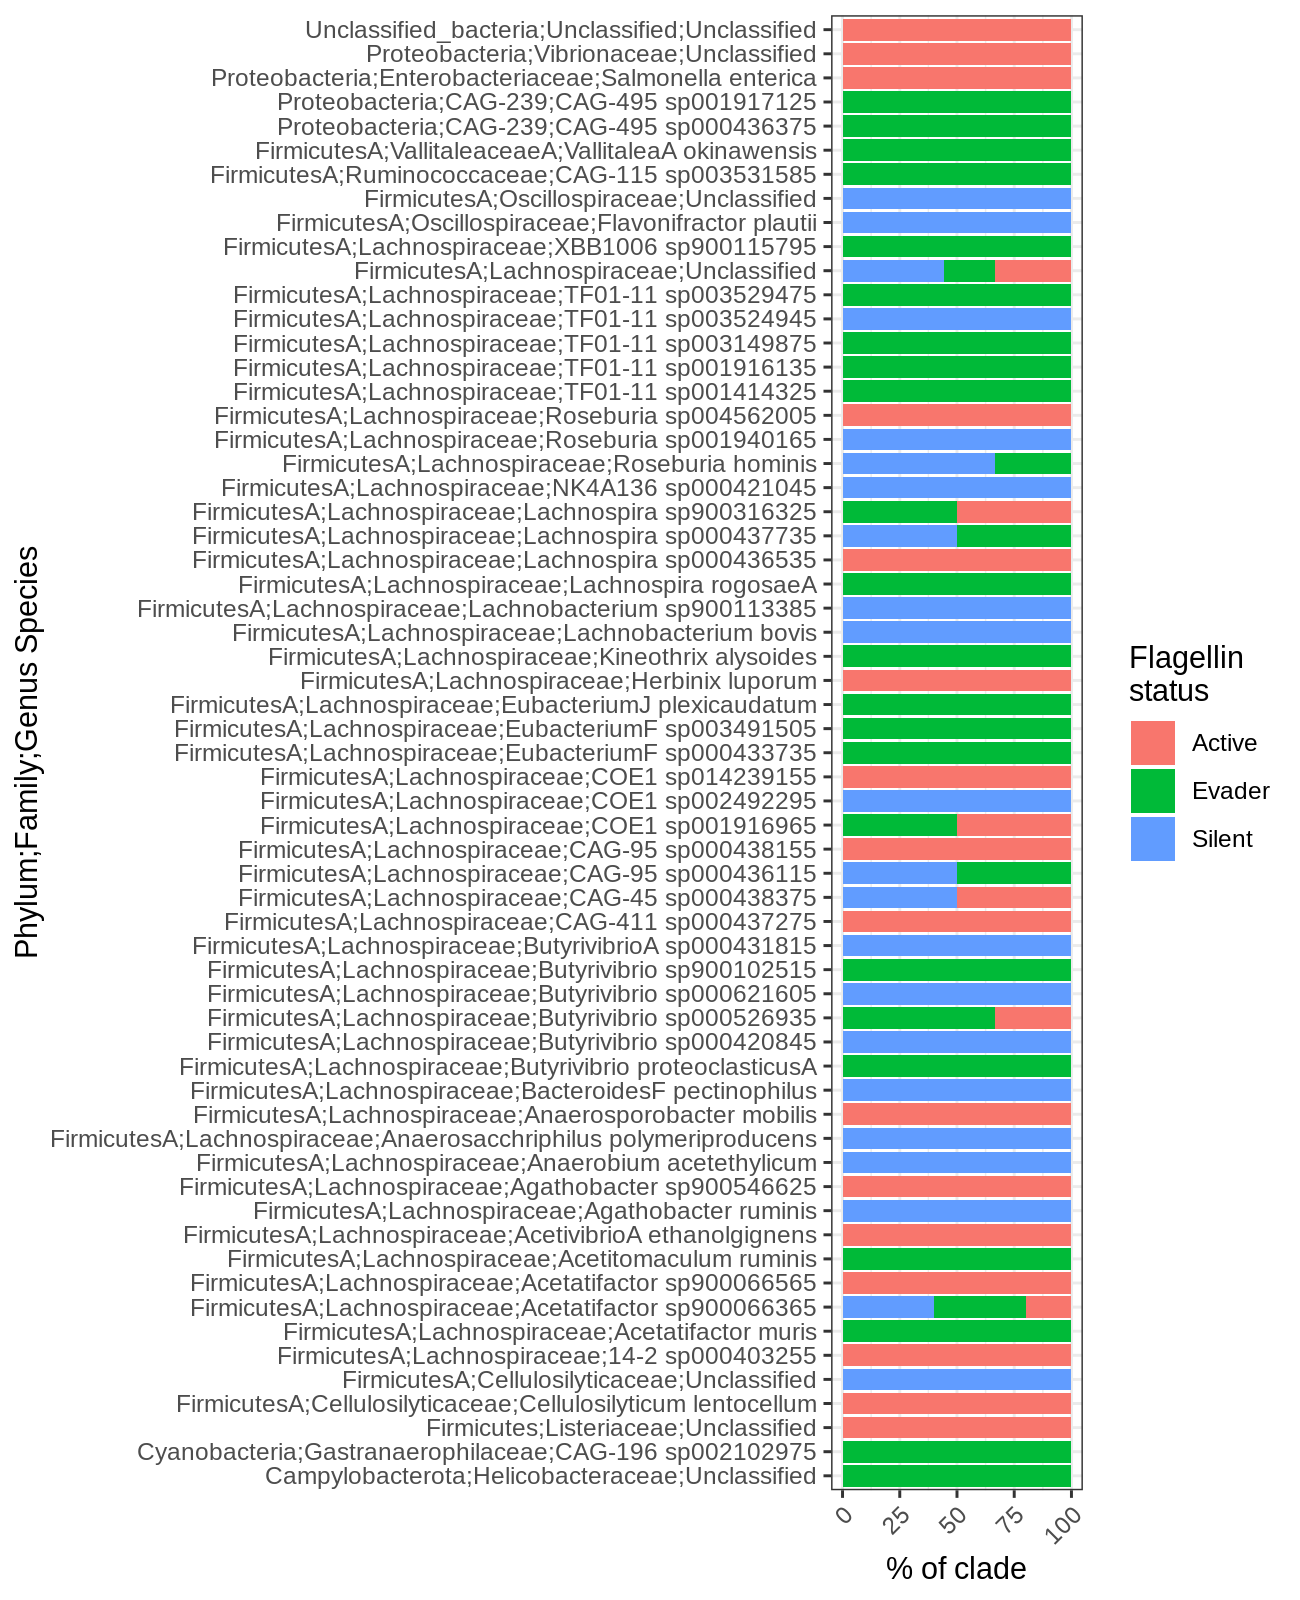

In [208]:
p = tax %>%
    mutate.(taxonomy = paste(Phylum, Family, Species, sep=';')) %>%
    filter.(!is.na(flg_status)) %>%
    mutate.(total = n.(), 
            .by = c(taxonomy)) %>%
    summarize.(n = n.() / first(total) * 100,
               .by = c(taxonomy, Phylum, flg_status)) %>%
    ggplot(aes(taxonomy, n, fill=flg_status)) +
    geom_bar(stat='identity') +
    labs(x='Phylum;Family;Genus Species', y='% of clade') +
    scale_fill_discrete('Flagellin\nstatus') +
    theme_bw() +
    coord_flip() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(6.5,8)
plot(p)

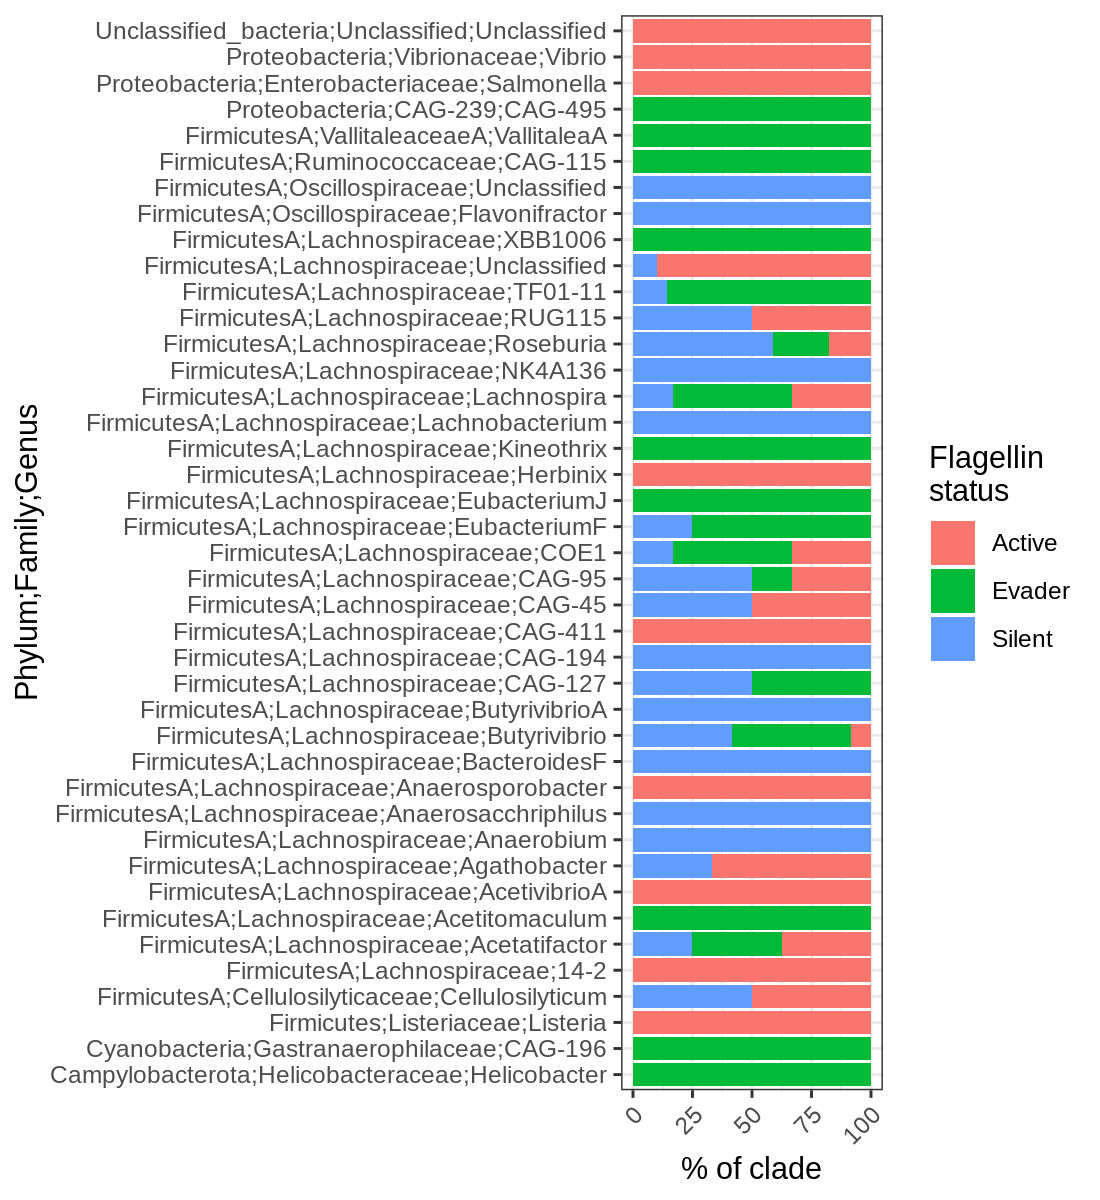

In [209]:
p = tax %>%
    mutate.(taxonomy = paste(Phylum, Family, Genus, sep=';')) %>%
    filter.(!is.na(flg_status)) %>%
    mutate.(total = n.(), 
            .by = c(taxonomy)) %>%
    summarize.(n = n.() / first(total) * 100,
               .by = c(taxonomy, Phylum, flg_status)) %>%
    ggplot(aes(taxonomy, n, fill=flg_status)) +
    geom_bar(stat='identity') +
    labs(x='Phylum;Family;Genus', y='% of clade') +
    scale_fill_discrete('Flagellin\nstatus') +
    theme_bw() +
    coord_flip() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(5.5,6)
plot(p)

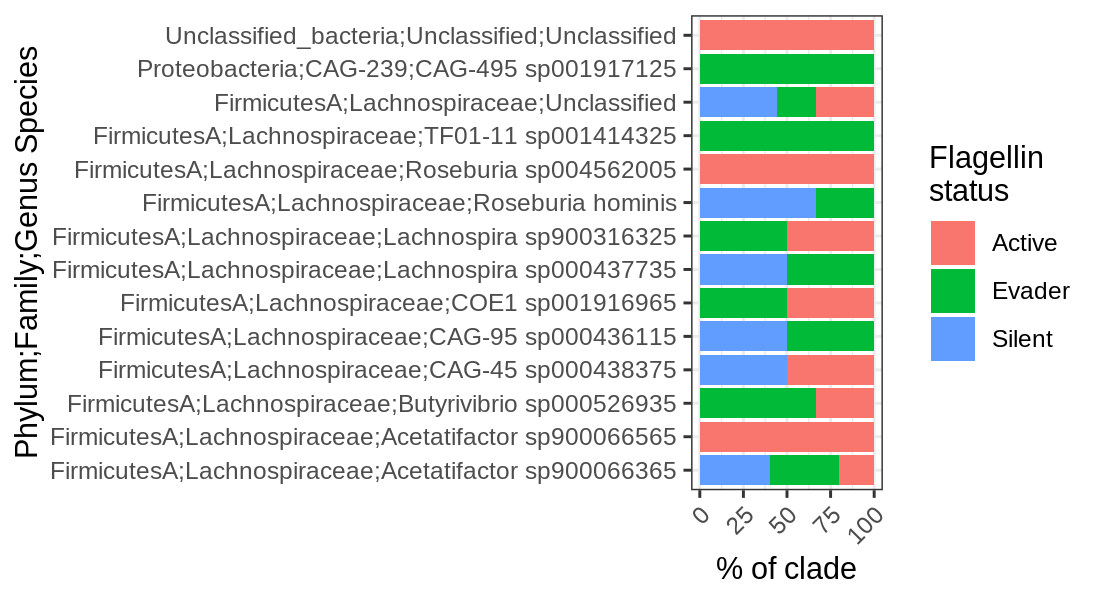

In [210]:
p = tax %>%
    mutate.(taxonomy = paste(Phylum, Family, Species, sep=';')) %>%
    filter.(!is.na(flg_status)) %>%
    mutate.(total = n.(), 
            .by = c(taxonomy)) %>%
    filter.(total >= 2) %>%
    summarize.(n = n.() / first(total) * 100,
               .by = c(taxonomy, Phylum, flg_status)) %>%
    ggplot(aes(taxonomy, n, fill=flg_status)) +
    geom_bar(stat='identity') +
    labs(x='Phylum;Family;Genus Species', y='% of clade') +
    scale_fill_discrete('Flagellin\nstatus') +
    theme_bw() +
    coord_flip() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(5.5,3)
plot(p)

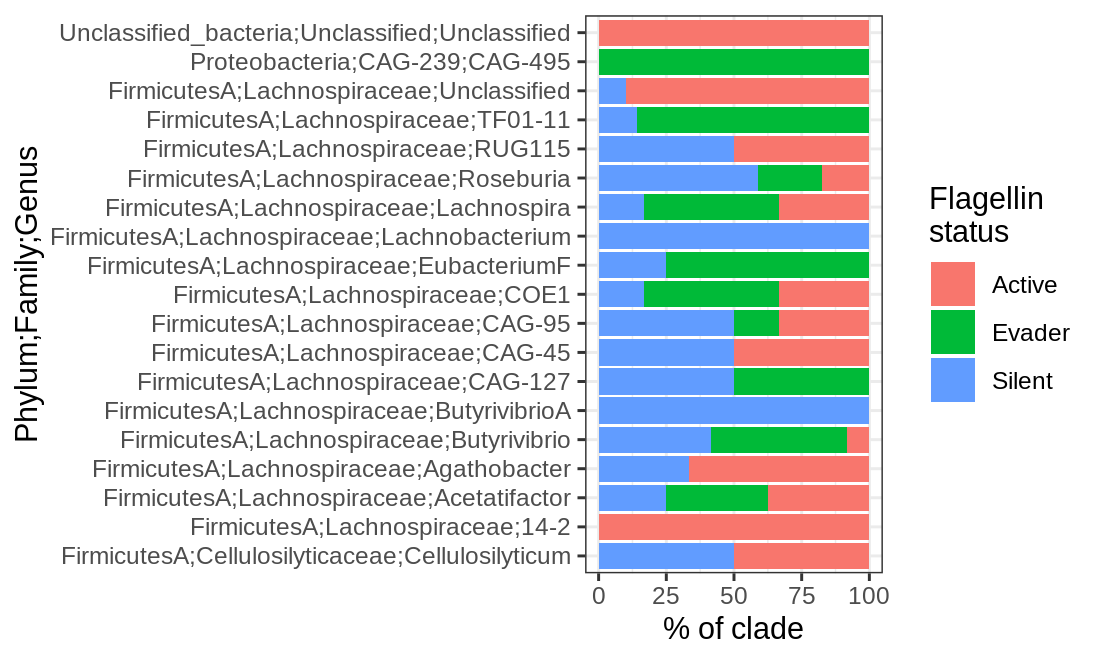

In [211]:
p = tax %>%
    mutate.(taxonomy = paste(Phylum, Family, Genus, sep=';')) %>%
    filter.(!is.na(flg_status)) %>%
    mutate.(total = n.(), 
            .by = c(taxonomy)) %>%
    filter.(total >= 2) %>%
    summarize.(n = n.() / first(total) * 100,
               .by = c(taxonomy, Phylum, flg_status)) %>%
    ggplot(aes(taxonomy, n, fill=flg_status)) +
    geom_bar(stat='identity') +
    labs(x='Phylum;Family;Genus', y='% of clade') +
    scale_fill_discrete('Flagellin\nstatus') +
    theme_bw() +
    coord_flip() 
p.dims(5.5,3.3)
plot(p)

# sessionInfo

In [127]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /tmp/global2/nyoungblut/code/general/conda_envs/general-tidyverse/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] clustermq_0.8.95.2 LeyLabRMisc_0.2.1  tidytable_0.6.6    data.table_1.14.2 
[5] ggplot2_3.3.5      tidyr_1.1.4        dplyr_1.0.7       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7        plyr_1.8.6        pillar_1.6.4      compiler_4.1.1   
 [5] R.metho